# An Analysis of "The Office"  IMDb ratings dataset 

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [49]:
df = pd.read_csv("C:\datasets\imdboffice2.csv" , usecols=["Season", "Title", "Rating", "Description","DirectedBy","WrittenBy"])

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 6 columns):
Season         188 non-null int64
Title          188 non-null object
Rating         188 non-null float64
Description    188 non-null object
DirectedBy     188 non-null object
WrittenBy      188 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 8.9+ KB


In [51]:
df.head(10)

,Season,Title,Rating,Description,DirectedBy,WrittenBy
0,1,Pilot,7.5,The premiere episode introduces the boss and s...,Ken Kwapis,"Ricky Gervais,Stephen Merchant,Greg Daniels"
1,1,Diversity Day,8.3,Michael's off color remark puts a sensitivity ...,Ken Kwapis,B. J. Novak
2,1,Health Care,7.8,Michael leaves Dwight in charge of picking the...,Ken Whittingham,Paul Lieberstein
3,1,The Alliance,8.1,"Just for a laugh, Jim agrees to an alliance wi...",Bryan Gordon,Michael Schur
4,1,Basketball,8.4,Michael and his staff challenge the warehouse ...,Greg Daniels,Greg Daniels
5,1,Hot Girl,7.8,Michael is just one of the many male staff who...,Amy Heckerling,Mindy Kaling
6,2,The Dundies,8.7,"Very much unlike his staff, an overeager Micha...",Greg Daniels,Mindy Kaling
7,2,Sexual Harassment,8.2,The office reviews its sexual harassment polic...,Ken Kwapis,B. J. Novak
8,2,Office Olympics,8.4,"Ready to finalize his deal for a new condo, Mi...",Paul Feig,Michael Schur
9,2,The Fire,8.4,A fire in the kitchen relegates the staff to t...,Ken Kwapis,B. J. Novak


In [52]:

df.set_index(keys=['Season'], drop=False,inplace=True)
# get a list of names
names=df['Season'].unique().tolist()
# now we can perform a lookup on a 'view' of the dataframe

s=[]
for x in range(1,10):
   s.append(df.loc[df.Season==x])
print(s)

[        Season          Title  Rating  \
Season                                  
1            1          Pilot     7.5   
1            1  Diversity Day     8.3   
1            1    Health Care     7.8   
1            1   The Alliance     8.1   
1            1     Basketball     8.4   
1            1       Hot Girl     7.8   

                                              Description       DirectedBy  \
Season                                                                       
1       The premiere episode introduces the boss and s...       Ken Kwapis   
1       Michael's off color remark puts a sensitivity ...       Ken Kwapis   
1       Michael leaves Dwight in charge of picking the...  Ken Whittingham   
1       Just for a laugh, Jim agrees to an alliance wi...     Bryan Gordon   
1       Michael and his staff challenge the warehouse ...     Greg Daniels   
1       Michael is just one of the many male staff who...   Amy Heckerling   

                                          Wri

In [53]:
print(s[0])

        Season          Title  Rating  \
Season                                  
1            1          Pilot     7.5   
1            1  Diversity Day     8.3   
1            1    Health Care     7.8   
1            1   The Alliance     8.1   
1            1     Basketball     8.4   
1            1       Hot Girl     7.8   

                                              Description       DirectedBy  \
Season                                                                       
1       The premiere episode introduces the boss and s...       Ken Kwapis   
1       Michael's off color remark puts a sensitivity ...       Ken Kwapis   
1       Michael leaves Dwight in charge of picking the...  Ken Whittingham   
1       Just for a laugh, Jim agrees to an alliance wi...     Bryan Gordon   
1       Michael and his staff challenge the warehouse ...     Greg Daniels   
1       Michael is just one of the many male staff who...   Amy Heckerling   

                                          Writ

In [54]:
avg_list = []

def avg_rating (season):
    return (s[season]["Rating"].mean())

for x in range(0,9):
    avg_list.append(avg_rating(x))
    
print(avg_list)
    

[7.983333333333333, 8.450000000000001, 8.6, 8.564285714285713, 8.496153846153847, 8.203846153846154, 8.320833333333335, 7.6291666666666655, 7.921739130434782]


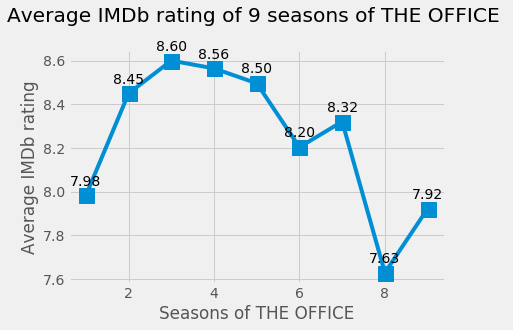

In [55]:
x = df["Season"].unique()
plt.style.use("fivethirtyeight")
plt.plot(x, avg_list, marker = "s", markersize=15)
plt.xlabel("Seasons of THE OFFICE")
plt.ylabel("Average IMDb rating")

plt.title("Average IMDb rating of 9 seasons of THE OFFICE \n ")


for x,y in zip(x,avg_list):
    
    label = "{:.2f}".format(y)
    
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')

plt.show()


### The huge dip during season 8 might be due to the fact that **Michael** ( [Steve Carell](https://www.google.com/search?sxsrf=ALeKk01hCbI2DK5Nb8jQXis-eZt6l35ZQg%3A1591042788100&ei=5GLVXuziBe7Yz7sP0aqPyAQ&q=steve+carell&oq=steve+carell&gs_lcp=CgZwc3ktYWIQAzIHCAAQgwEQQzIECAAQQzIECAAQQzIECAAQQzIHCAAQgwEQQzIECAAQQzICCAAyBAgAEEMyBAgAEEMyAggAOgQIIxAnUOPAE1iB2hNgodwTaABwAHgAgAGJAYgBqwiSAQQxMC4ymAEAoAEBqgEHZ3dzLXdpeg&sclient=psy-ab&ved=0ahUKEwjs5NOhuOHpAhVu7HMBHVHVA0kQ4dUDCAw&uact=5)) who was one of THE main characters left the show after 7th season.

## Computing and visualizing the average ratings w.r.to the prominent directors

In [56]:
df["DirectedBy"].describe()

count                 188
unique                 55
top       Randall Einhorn
freq                   15
Name: DirectedBy, dtype: object

#### The number of unique directors in the show is : 55

In [57]:
df["DirectedBy"].unique()

array(['Ken Kwapis', 'Ken Whittingham', 'Bryan Gordon', 'Greg Daniels',
       'Amy Heckerling', 'Paul Feig', 'Charles McDougall',
       'Dennie Gordon', 'Victor Nelli, Jr.', 'Roger Nygard',
       'Randall Einhorn', 'Miguel Arteta', 'Tucker Gates',
       'Jeffrey Blitz', 'Harold Ramis', 'Julian Farino', 'Joss Whedon',
       'J. J. Abrams', 'Craig Zisk', 'Paul Lieberstein', 'Jason Reitman',
       'Jennifer Celotta', 'David Rogers', 'Stephen Merchant',
       'Dean Holland', 'Asaad Kelada', 'Gene Stupnitsky', 'Steve Carell',
       'Brent Forrester', 'Lee Eisenberg', 'Reggie Hudlin', 'Seth Gordon',
       'B. J. Novak', 'John Krasinski', 'Marc Webb', 'Matt Sohn',
       'Mindy Kaling', 'Rainn Wilson', 'John Stuart Scott',
       'Alex Hardcastle', 'Danny Leiner', 'Michael Spiller',
       'Troy Miller', 'Charlie Grandy', 'Ed Helms', 'Eric Appel',
       'Brian Baumgartner', 'Claire Scanlon', 'Daniel Chun',
       'Bryan Cranston', 'Rodman Flender', 'Kelly Cantley', 'Lee Kirk',
     

#### We can see from above the names of those 55 directors. If you look closely you can find that a lot of actors like Mindy Kaling, B.J.Novak, John Krasinski etc. have not only acted but also directed the episodes!

In [58]:
df["DirectedBy"].value_counts()

Randall Einhorn      15
Paul Feig            15
Ken Kwapis           13
Greg Daniels         13
Jeffrey Blitz        11
David Rogers          9
Ken Whittingham       9
Charles McDougall     8
Matt Sohn             8
Paul Lieberstein      7
B. J. Novak           5
Tucker Gates          4
Brent Forrester       4
Rainn Wilson          3
John Krasinski        3
Steve Carell          3
Harold Ramis          3
Seth Gordon           3
Troy Miller           3
Jennifer Celotta      3
Mindy Kaling          2
Bryan Gordon          2
Dean Holland          2
Joss Whedon           2
Ed Helms              2
Rodman Flender        2
Claire Scanlon        2
Jason Reitman         2
Victor Nelli, Jr.     2
Julian Farino         2
Dennie Gordon         2
John Stuart Scott     1
Danny Leiner          1
Miguel Arteta         1
Lee Kirk              1
Roger Nygard          1
Asaad Kelada          1
Gene Stupnitsky       1
Lee Eisenberg         1
Kelly Cantley         1
Reggie Hudlin         1
Jon Favreau     

#### Thus the number of episodes directed by each director can be seen now. Since this is too much to plot, we'll have a cut-off value of minimum 5 episodes. That brings the number of directors down to 11 as you will see.

In [59]:
df["DirectedBy"].value_counts().head(11)

Randall Einhorn      15
Paul Feig            15
Ken Kwapis           13
Greg Daniels         13
Jeffrey Blitz        11
David Rogers          9
Ken Whittingham       9
Charles McDougall     8
Matt Sohn             8
Paul Lieberstein      7
B. J. Novak           5
Name: DirectedBy, dtype: int64

In [60]:
df["DirectedBy"].value_counts().head(11).keys()

Index(['Randall Einhorn', 'Paul Feig', 'Ken Kwapis', 'Greg Daniels',
       'Jeffrey Blitz', 'David Rogers', 'Ken Whittingham', 'Charles McDougall',
       'Matt Sohn', 'Paul Lieberstein', 'B. J. Novak'],
      dtype='object')

#### Thus the names of these 13 directors is obtained.

In [61]:
list1=[]

def dir_mean_rating (director):
    return df.loc[df["DirectedBy"] == director, "Rating"].mean()

for x in df["DirectedBy"].value_counts().head(11).keys():
   list1.append(dir_mean_rating(x))


print(list1)


[8.133333333333333, 8.746666666666668, 8.623076923076923, 8.446153846153846, 8.318181818181818, 7.933333333333334, 8.277777777777779, 8.3625, 7.8375, 8.157142857142857, 7.960000000000001]


#### The above function takes the name of director as the argument and returns the mean rating of all their episodes. The for loop is used to append the mean rating values to a list.

#### Since we want to plot the average ratings of each director , the x-axis will be the names of the directors and the y-axis will be their ratings.

In [62]:
xs=list(df["DirectedBy"].value_counts().head(11).keys())

ys=list1

Text(0.5, 1.0, "Directors and their episodes' ratings")

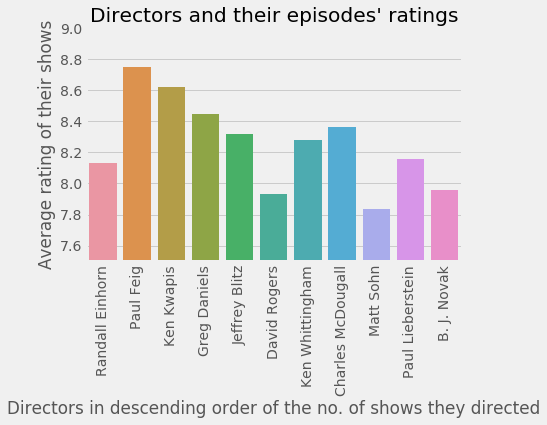

In [75]:
g = sns.barplot(xs,ys)
g.set(ylim=(7.5,9))
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.xlabel("Directors in descending order of the no. of shows they directed")
plt.ylabel("Average rating of their shows")
plt.title("Directors and their episodes' ratings")





 * Clearly , the director whose episodes have the highest average rating is Paul Feig.
 * He has directed 15 episodes totally(which is about 8% of the show).

### Now let us see which episode had the highest rating and analyze

In [76]:
df_desc_ordered = df.sort_values(by=['Rating'], ascending=False)
print(df_desc_ordered.head(10))

        Season                  Title  Rating  \
Season                                          
9            9                 Finale     9.8   
7            7       Goodbye, Michael     9.8   
5            5          Stress Relief     9.7   
9            9               A.A.R.M.     9.5   
2            2           Casino Night     9.4   
7            7  Threat Level Midnight     9.4   
6            6        Niagara: Part 2     9.4   
4            4           Dinner Party     9.4   
6            6        Niagara: Part 1     9.4   
4            4          Goodbye, Toby     9.3   

                                              Description     DirectedBy  \
Season                                                                     
9       One year later, Dunder Mifflin employees past ...     Ken Kwapis   
7       As the office gets ready for Michael's final d...      Paul Feig   
5       Dwight's too-realistic fire alarm gives Stanle...  Jeffrey Blitz   
9       Dwight prepares for a m

#### We can see that out of the top 5 episodes, 2 are directed by Ken Kwapis (third in the average ratings list) and 2 (first two in fact) are written by Greg Daniels. 
#### The fact that Toby(Paul Liberstein) is one of the top writers is truly amazing! 

### When ordering the other way, we can find some insights regarding the episodes with the least ratings.

In [77]:
df_asc_ordered = df.sort_values(by=['Rating'], ascending=True)
print(df_asc_ordered.head(10))

        Season              Title  Rating  \
Season                                      
8            8       Get the Girl     6.6   
6            6         The Banker     6.8   
8            8         Gettysburg     6.9   
9            9  Here Comes Treble     7.0   
8            8      Welcome Party     7.1   
8            8         Angry Andy     7.1   
8            8         Fundraiser     7.1   
9            9      Roy's Wedding     7.2   
9            9   Couples Discount     7.3   
8            8              Lotto     7.3   

                                              Description      DirectedBy  \
Season                                                                      
8       Andy goes to Tallahassee to tell Erin that he ...    Rainn Wilson   
6       A banker representing a potential buyer comes ...   Jeffrey Blitz   
8       Andy decides to motivate and inspire everyone ...   Jeffrey Blitz   
9       On Halloween, the Cornell a Capella group pays...  Claire Scanlon 

#### It's interesting to see how not a single episode from season 8 ranks even in the top 20 while out of the 10 bottom ranked episodes , 6 of them belong to season 8.
#### No wonder the season 8 average rankings took such a huge hit. 

#### This begs the question, which was the highest ranking episode of season 8 and what was it's rating?

In [78]:

s8 = df[df["Season"] == 8] 
s8.loc[s8["Rating"] == s8["Rating"].max()]

,Season,Title,Rating,Description,DirectedBy,WrittenBy
Season,,,,,,
8,8,The List,8.2,New Dunder Mifflin CEO Robert California leave...,B. J. Novak,B. J. Novak


#### Looks like Ryan wasn't completely useless after all :)

## Moving on to the writers.

In [79]:
df["WrittenBy"].unique()

array(['Ricky Gervais,Stephen Merchant,Greg Daniels', 'B. J. Novak',
       'Paul Lieberstein', 'Michael Schur', 'Greg Daniels',
       'Mindy Kaling', 'Gene Stupnitsky,Lee Eisenberg', 'Larry Wilmore',
       'Jennifer Celotta', 'Lee Eisenberg,Gene Stupnitsky',
       'Steve Carell', 'Brent Forrester',
       'Ricky Gervais,Stephen Merchant', 'Justin Spitzer',
       'Michael Schur,Lee Eisenberg,Gene Stupnitsky',
       'Lee Eisenberg,Gene Stupnitsky,Michael Schur', 'Caroline Williams',
       'Justin Spitzer,Brent Forrester', 'Jennifer Celotta,Greg Daniels',
       'Paul Lieberstein,Michael Schur', 'Lester Lewis',
       'Brent Forrester,Justin Spitzer',
       'Jennifer Celotta,Paul Lieberstein', 'Ryan Koh', 'Aaron Shure',
       'Charlie Grandy', 'Anthony Q. Farrell',
       'Warren Lieberstein,Halsted Sullivan', 'Greg Daniels,Mindy Kaling',
       'Daniel Chun', 'Jason Kessler', 'Jonathan Hughes', 'Peter Ocko',
       'Jon Vitti', 'Halsted Sullivan,Warren Lieberstein',
       'Carr

In [80]:
df["WrittenBy"].value_counts()

Mindy Kaling                                   20
B. J. Novak                                    15
Paul Lieberstein                               13
Justin Spitzer                                  9
Greg Daniels                                    9
Brent Forrester                                 9
Jennifer Celotta                                8
Gene Stupnitsky,Lee Eisenberg                   8
Charlie Grandy                                  7
Daniel Chun                                     7
Michael Schur                                   7
Aaron Shure                                     6
Lee Eisenberg,Gene Stupnitsky                   5
Owen Ellickson                                  4
Robert Padnick                                  4
Carrie Kemper                                   4
Warren Lieberstein,Halsted Sullivan             4
Steve Hely                                      3
Allison Silverman                               3
Halsted Sullivan,Warren Lieberstein             3


In [81]:
list2=[]
df1 = pd.read_csv("C:\datasets\imdboffice1.csv" , usecols=["Season", "Title", "Rating","WrittenBy"])

In [82]:
df1['id'] = df1.index + 1
df2 = df1.set_index('id').WrittenBy.str.split(',' ,expand = True ).stack().reset_index(1,drop=True).reset_index(name = 'Writers')
df2.head()      
            


,id,Writers
0,1,Ricky Gervais
1,1,Stephen Merchant
2,1,Greg Daniels
3,2,B. J. Novak
4,3,Paul Lieberstein


In [83]:
counts = df2["Writers"].value_counts().to_dict()
print(counts)

{'Mindy Kaling': 22, 'Paul Lieberstein': 16, 'Lee Eisenberg': 15, 'Gene Stupnitsky': 15, 'B. J. Novak': 15, 'Greg Daniels': 13, 'Brent Forrester': 11, 'Justin Spitzer': 11, 'Jennifer Celotta': 11, 'Michael Schur': 10, 'Warren Lieberstein': 7, 'Halsted Sullivan': 7, 'Charlie Grandy': 7, 'Daniel Chun': 7, 'Aaron Shure': 6, 'Owen Ellickson': 4, 'Robert Padnick': 4, 'Carrie Kemper': 4, 'Steve Hely': 3, 'Allison Silverman': 3, 'Ricky Gervais': 2, 'Stephen Merchant': 2, 'Amelie Gillette': 2, 'Jonathan Green': 2, 'Graham Wagner': 2, 'Lester Lewis': 2, 'Anthony Q. Farrell': 2, 'Niki Schwartz-Wright': 2, 'Steve Carell': 2, 'Ryan Koh': 2, 'Gabe Miller': 2, 'Dan Sterling': 2, 'Jon Vitti': 2, 'Dan Greaney': 2, 'Larry Wilmore': 1, 'Jason Kessler': 1, 'Caroline Williams': 1, 'Tim McAuliffe': 1, 'Peter Ocko': 1, 'Jonathan Hughes': 1}


##### Clearly Kelly ( [Mindy Kaling](https://www.google.com/search?q=mindy+kaling&oq=mindy+kaling&aqs=chrome..69i57.3698j0j1&sourceid=chrome&ie=UTF-8) ) and Toby ( [Paul Liberstein](https://www.google.com/search?sxsrf=ALeKk01XY01d3HgtPb6_YPZHAOTU0GhOyQ%3A1591042714563&ei=mmLVXvn8IZjtz7sP05K-2As&q=paul+lieberstein&oq=paul+libe&gs_lcp=CgZwc3ktYWIQAxgAMgcIIxCxAhAnMgQIABBDMgQIABBDMgQIABAKMgQIABAKMgQIABAKMgQIABAKMgQIABAKMgQIABAKMgQIABAKOgQIIxAnOgcIIxDqAhAnOgIIADoGCAAQDRAKOgQIABANOggIABAWEAoQHjoKCAAQDRAFEAoQHjoICAAQCBANEB5QjY8EWO-kBGDztARoBHAAeACAAfIBiAHzDJIBBjAuMTAuMZgBAKABAaoBB2d3cy13aXqwAQo&sclient=psy-ab) ) are the top two writers in terms of the number of episodes written for.  


#### I'm now curious about the people who have held the title of "Director" and "Writer" in the show. So we make sets out of the "WrittenBy" and "DirectedBy" columns and find the common names in both. 

In [84]:
dir_and_writer = list(set(df.WrittenBy) & set(df.DirectedBy))
print(dir_and_writer)


['Charlie Grandy', 'Steve Carell', 'B. J. Novak', 'Mindy Kaling', 'Greg Daniels', 'Brent Forrester', 'Jennifer Celotta', 'Paul Lieberstein', 'Daniel Chun']


#### Out of this list of amazing people , I found with a little bit of Google Search that 
 * Brent Forrester, Jennifer Celotta, Greg Daniels have appeared in the finale with minor roles.
 * Steve Carell, B.J. Novak , Mindy Kaling, Paul Lieberstein have had major roles through the seasons.
 
